In [1]:
# !/usr/local/bin/python3.11 -m pip install ipympl

In [2]:
%matplotlib widget

In [3]:
from app.core.PoseHelper import PoseHelper
from app.core.SugesstionBuilder import SuggestionBuilder
import mediapipe as mp

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


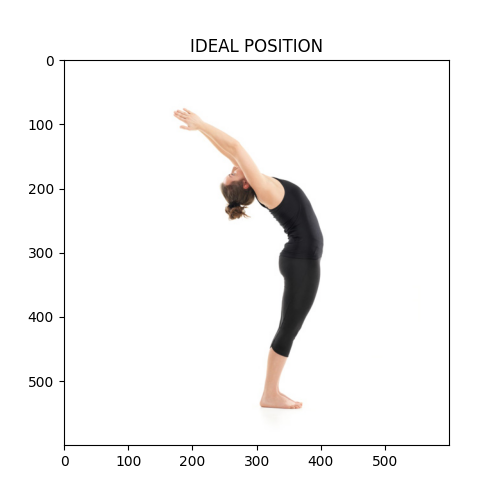

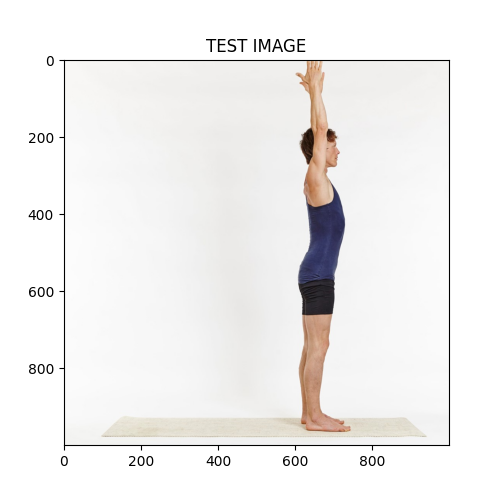

In [4]:
ideal = PoseHelper("app/media/hastauttanasana.jpg") # app/data/suryanamaskarsteps/02.hastauttasana.jpg")
# app/media/Pranamasana-train.png')
my_pose = PoseHelper("app/media/raised_arms_side_view.jpeg") # app/media/00.a_pranamasana_side_view.jpeg")
# app/media/pranamasana_wrong.jpg")
ideal.display_img([5, 5], "IDEAL POSITION")
my_pose.display_img([5, 5], "TEST IMAGE")

Landmarks are extracted:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


NOSE:
[716.2275910377502, 240.8440113067627, -76.08875632286072]
LEFT_EYE_INNER:
[706.8958878517151, 223.3457863330841, -57.39119276404381]
LEFT_EYE:
[703.4791707992554, 223.77097606658936, -57.84974247217178]
LEFT_EYE_OUTER:
[700.5437016487122, 224.52792525291443, -57.71901458501816]
RIGHT_EYE_INNER:
[705.6226134300232, 222.97823429107666, -114.09418284893036]
RIGHT_EYE:
[701.5414237976074, 223.23447465896606, -114.61450904607773]
RIGHT_EYE_OUTER:
[698.0705857276917, 223.76853227615356, -114.81697112321854]
LEFT_EAR:
[680.8319091796875, 231.94903135299683, 46.549275517463684]
RIGHT_EAR:
[677.1520972251892, 230.75643181800842, -212.67810463905334]
MOUTH_LEFT:
[711.3118171691895, 256.9909393787384, -25.45672096312046]
MOUTH_RIGHT:
[710.0284099578857, 257.0528984069824, -103.98081690073013]
LEFT_SHOULDER:
[658.0820083618164, 302.45494842529297, 171.6608852148056]
RIGHT_SHOULDER:
[656.4784646034241, 299.6062636375427, -288.71193528175354]
LEFT_ELBOW:
[665.5828356742859, 191.2461817264557,

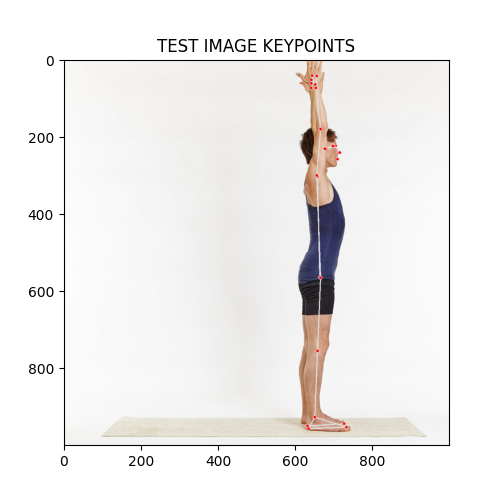

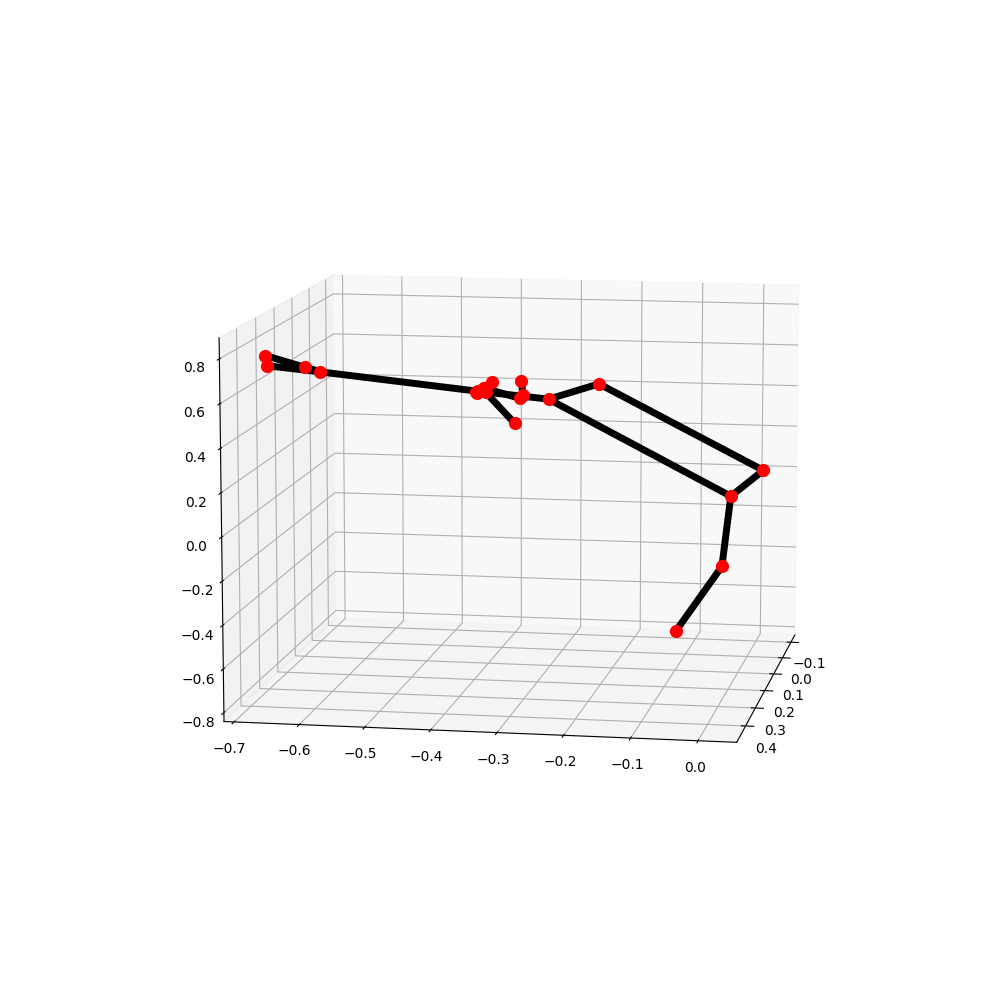

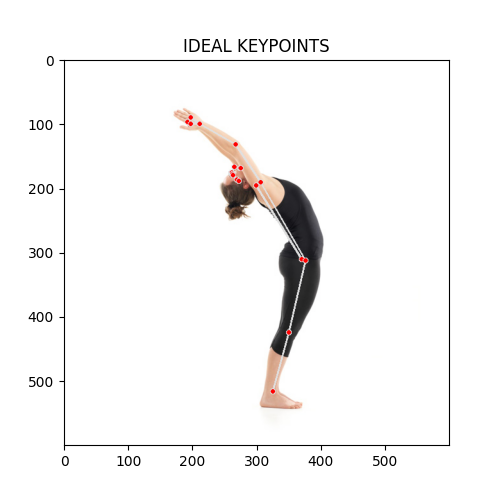

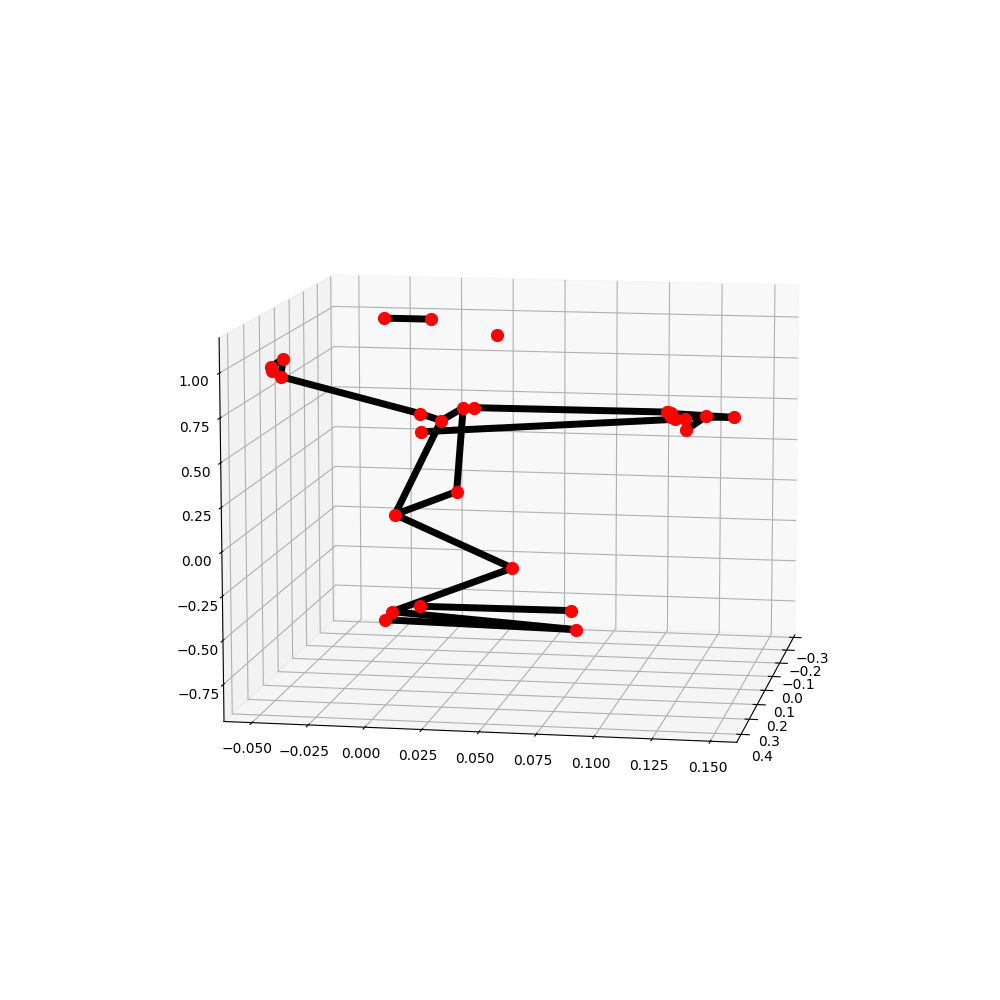

In [5]:
print("Landmarks are extracted:")
ideal.detect_keypoints(verbose=False)
my_pose.detect_keypoints(verbose=True)
my_pose.plot_keypoints2d(fig_title="TEST IMAGE KEYPOINTS")
ideal.plot_keypoints3d()
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
my_pose.plot_keypoints3d()

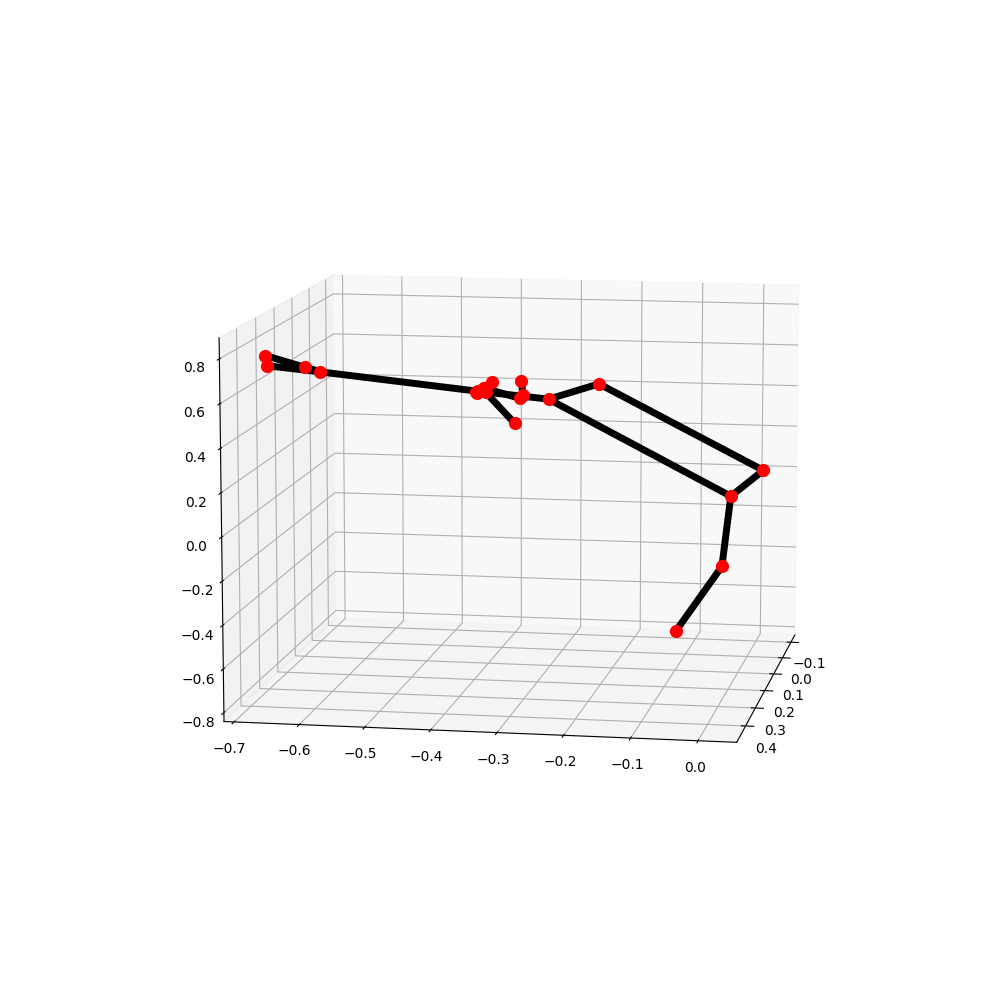

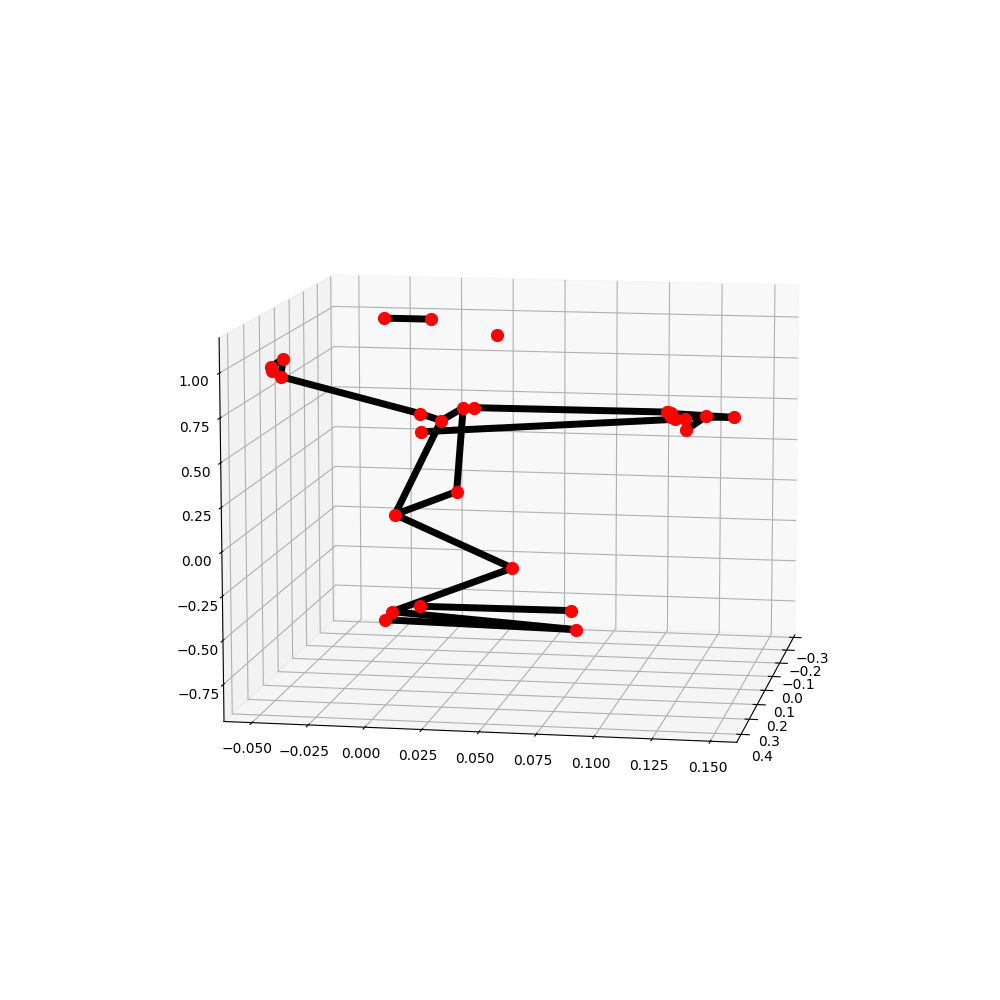

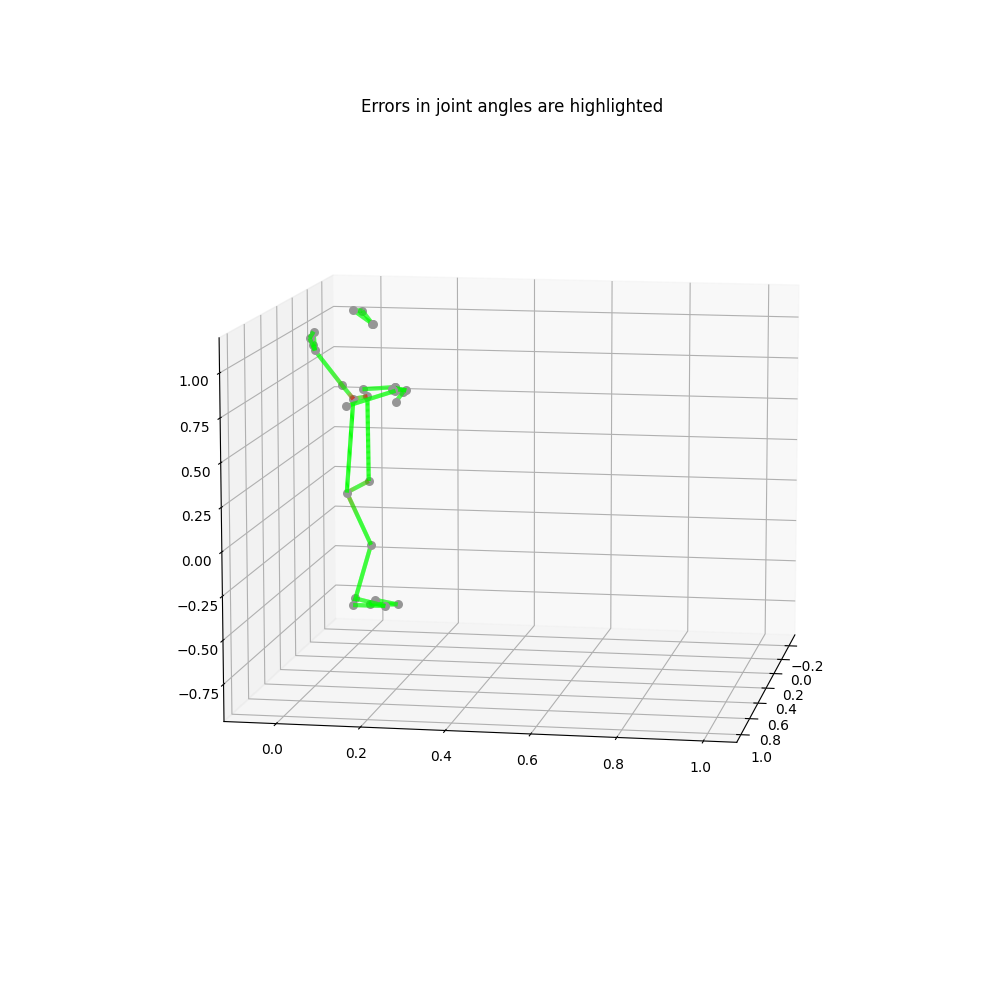

In [6]:
my_pose.calculate_angles()
ideal.calculate_angles()

ideal.plot_keypoints3d() #fig_title="IDEAL BODY POSITION")
my_pose.plot_keypoints3d() #fig_title="Test Body Position")
my_pose.draw3dErrorDetectedSkeleton(ideal,"Errors in joint angles are highlighted", pronounce_error_by=3,verbose=False)

In [7]:
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
                    ideal.arms_and_angles, my_pose.arms_and_angles, 33
                )

In [8]:
suggestor = SuggestionBuilder()
print(suggestor.get_suggestions(arms_and_angles_diff))

[('LEFT_SHOULDER Very Bad', 243.83073056352623), ('RIGHT_SHOULDER Very Bad', 118.18684777860979), ('LEFT_ELBOW Perfect', 9.925304192766902), ('RIGHT_ELBOW Good', 14.938462863857353), ('LEFT_HIP Not Good', 36.0114017066151), ('RIGHT_HIP Not Good', 39.86545051330176), ('LEFT_KNEE Perfect', 6.040076705544945), ('RIGHT_KNEE Perfect', 2.0769039908299662)]


In [9]:
# print(my_pose.arms_and_angles)
# from math import pi
# import math

# for i in range(len(my_pose.arms_and_angles)):
#     if(my_pose.arms_and_angles[i]):
#         for arms,angle in my_pose.arms_and_angles[i].items():
#             arms = list(arms)
#             print(f"for joint {i}.{my_pose.mp_pose.PoseLandmark(i).name} between {arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[1]).name} angle: {math.degrees(angle)} degrees")

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.LEFT_ELBOW: 13>}): array([ 1.69410093,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.RIGHT_ELBOW: 14>}): array([-1.46768615,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_WRIST: 15>}): array([-0.35221335,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_WRIST: 16>, <PoseLandmark.RIGHT_SHOULDER: 12>}): array([-0.44947437,  0.        , -0.        ])}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>, <PoseLandmark.LEFT_KNEE: 25>}): array([ 0.7372537,  0.       , -0.       ])}, {frozenset({<PoseLandmark.RIGHT_KNEE: 26>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.76927048,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_ANKLE: 27>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.04700136,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>,

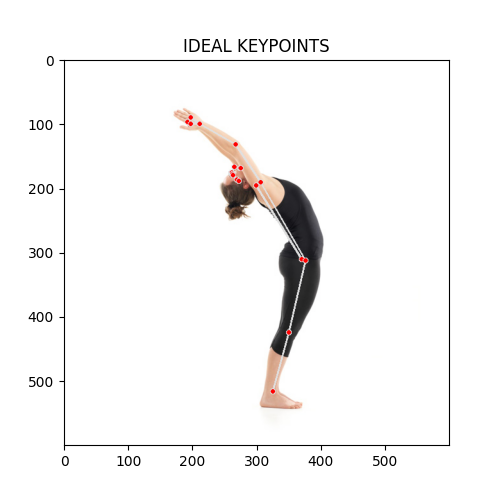

for joint 11.LEFT_SHOULDER between 12.RIGHT_SHOULDER  & 13.LEFT_ELBOW angle: [ 1.69410093  0.         -0.        ] radians
for joint 12.RIGHT_SHOULDER between 11.LEFT_SHOULDER  & 14.RIGHT_ELBOW angle: [-1.46768615  0.         -0.        ] radians
for joint 13.LEFT_ELBOW between 11.LEFT_SHOULDER  & 15.LEFT_WRIST angle: [-0.35221335  0.         -0.        ] radians
for joint 14.RIGHT_ELBOW between 16.RIGHT_WRIST  & 12.RIGHT_SHOULDER angle: [-0.44947437  0.         -0.        ] radians
for joint 23.LEFT_HIP between 24.RIGHT_HIP  & 25.LEFT_KNEE angle: [ 0.7372537  0.        -0.       ] radians
for joint 24.RIGHT_HIP between 26.RIGHT_KNEE  & 23.LEFT_HIP angle: [ 0.76927048  0.         -0.        ] radians
for joint 25.LEFT_KNEE between 27.LEFT_ANKLE  & 23.LEFT_HIP angle: [ 0.04700136  0.         -0.        ] radians
for joint 26.RIGHT_KNEE between 24.RIGHT_HIP  & 28.RIGHT_ANKLE angle: [ 0.03377602  0.         -0.        ] radians


In [10]:
print(ideal.arms_and_angles)
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
# ideal.detect_keypoints(verbose=True)
from math import pi
import math

multiplier = 1# 180/pi
for vertex in range(len(ideal.arms_and_angles)):
    if(ideal.arms_and_angles[vertex]):
        for arms,angle in ideal.arms_and_angles[vertex].items():
            arms = list(arms)
            print(f"for joint {vertex}.{ideal.mp_pose.PoseLandmark(vertex).name} between {arms[0]}.{ideal.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{ideal.mp_pose.PoseLandmark(arms[1]).name} angle: {angle} radians")

In [18]:
from app.core.graphics.graphics_assistant import draw_error_landmarks_2d

n = 33
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
    ideal.arms_and_angles, my_pose.arms_and_angles, n
)

img = my_pose.img.copy()
draw_error_landmarks_2d(
    arms_and_angles_diff=arms_and_angles_diff,
    img=img,
    landmark_list=my_pose.results.pose_landmarks,
    pronounce_error_by= 4,
    connections=my_pose.mp_pose.POSE_CONNECTIONS,
    verbose=False,
    drawing_spec_radius=7
)

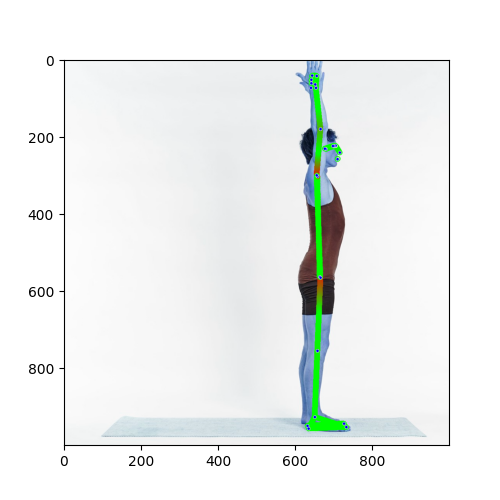

In [19]:
import matplotlib.pyplot as plt
fig_title=""
figsize=[5, 5]
fig = plt.figure(figsize=figsize)
plt.title(fig_title)
plt.imshow(img)
plt.show()

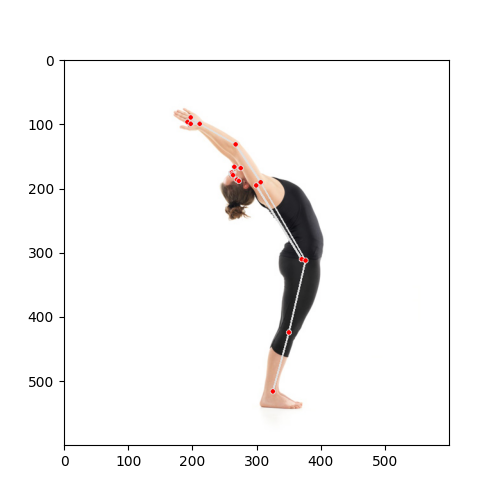

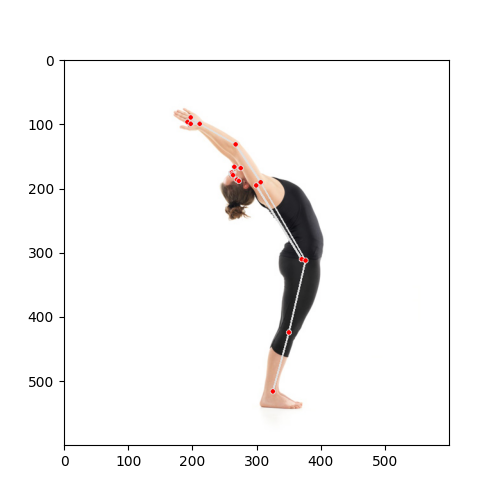

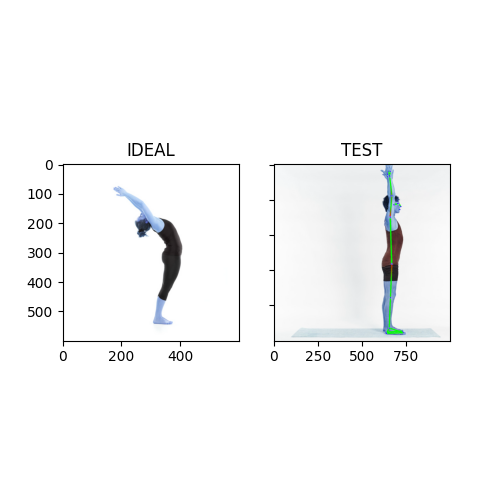

In [13]:
fig, axs = plt.subplots(1, 2, figsize=figsize)
fig.suptitle(fig_title)
axs[0].imshow(ideal.img)
axs[1].imshow(img)
axs[0].set_title("IDEAL")
axs[1].set_title("TEST")
for ax in axs.flat:
    ax.label_outer()
# fig.tight_layout()
ideal.plot_keypoints2d()
plt.show()

In [21]:
suggester = SuggestionBuilder()

In [23]:
suggestions = suggester.get_suggestions(arms_and_angles_diff)
suggestions.sort(key=lambda x: x[1], reverse=True)
print("\n".join([f"{s[0]}" for s in suggestions]))

LEFT_SHOULDER Very Bad
RIGHT_SHOULDER Very Bad
RIGHT_HIP Not Good
LEFT_HIP Not Good
RIGHT_ELBOW Good
LEFT_ELBOW Perfect
LEFT_KNEE Perfect
RIGHT_KNEE Perfect
